console.txt

```
0: [31719.00, 33052.00, 30655.00, 29834.00, 31921.00, 31704.00, 29493.00, 31121.00, 32630.00, 30279.00, 29983.00, 32571.00, 31457.00, 29089.00, 31324.00, 32383.00]
1: [1289.83, 1571.46, 1191.52, 1284.93, 1485.04, 1100.76, 1856.35, 888.37, 2076.86, 803.43, 2292.47, 749.66, 2007.09, 888.54, 1788.86, 1095.81]
2: [4048.19, 3632.96, 4201.09, 3717.78, 4246.75, 3776.73, 3997.60, 4007.42, 3783.30, 4167.25, 3639.40, 4416.80, 3527.53, 4654.50, 3498.63, 4799.78]
3: [4681.64, 3504.76, 4586.47, 3379.78, 4581.97, 3500.48, 4581.76, 3732.13, 4495.86, 3861.64, 4516.18, 3993.66, 4402.73, 4149.30, 4239.61, 4332.50]
4: [1303.78, 1363.06, 1468.58, 1487.09, 1325.71, 1619.45, 1130.65, 1714.51, 947.84, 1768.40, 745.58, 1773.36, 816.03, 1732.58, 1092.46, 1684.32]
5: [573.82, 1240.97, 372.65, 1151.74, 658.99, 1069.12, 842.81, 881.24, 1068.13, 611.77, 1149.24, 527.91, 1216.00, 207.38, 1285.50, 91.26]
6: [1076.32, 260.30, 1167.03, 292.41, 1132.41, 135.89, 1074.38, 256.83, 992.97, 565.20, 699.58, 781.31, 538.20, 991.23, 207.03, 1109.89]
7: [1064.32, 1358.14, 1019.62, 1524.31, 928.31, 1738.32, 995.49, 1796.58, 1166.52, 1815.99, 1165.46, 1830.94, 1106.45, 1724.33, 960.77, 1575.60]
8: [1635.64, 1000.61, 1441.83, 1070.43, 1596.66, 1296.91, 1697.55, 1513.38, 1710.57, 1622.56, 1614.79, 1741.15, 1447.55, 1685.47, 1356.56, 1646.95]
9: [329.88, 736.64, 674.70, 711.67, 408.25, 472.12, 179.19, 338.21, 66.15, 497.79, 343.64, 641.17, 564.64, 730.68, 706.83, 814.76]
10: [576.90, 620.98, 681.41, 598.96, 595.72, 543.89, 430.32, 335.15, 316.95, 145.08, 140.52, 115.93, 211.71, 335.53, 483.62, 525.62]
11: [447.49, 446.61, 486.76, 570.59, 503.61, 654.23, 656.30, 531.87, 650.44, 448.98, 449.02, 265.10, 304.42, 56.22, 185.08, 171.20]
12: [508.28, 529.83, 521.05, 621.49, 492.85, 596.30, 607.13, 494.47, 878.12, 594.36, 964.14, 857.59, 1016.67, 1030.73, 873.48, 1055.65]
13: [933.58, 708.55, 696.22, 570.58, 939.82, 576.42, 1062.33, 769.99, 1036.56, 950.46, 972.35, 1061.85, 889.51, 1041.82, 960.18, 1006.75]
14: [498.17, 477.13, 247.44, 481.09, 398.80, 362.63, 501.90, 132.47, 455.12, 143.29, 375.06, 355.47, 111.11, 452.27, 148.68, 478.74]
15: [197.40, 431.20, 42.29, 396.26, 213.22, 361.58, 224.84, 226.60, 363.68, 99.26, 393.91, 272.73, 236.17, 425.19, 53.49, 436.93]
...
```

## Maximum des Frequency Sweeps auswerten

0[]
1[]
2[3 8]
3[]
4[]
5[]
6[3]
7[]
8[]
9[]
10[ 3  7 13 17]
11[]
12[]
13[]
14[]
15[]
[      0.        390.625     781.25     1171.875    1562.5      1953.125
    2343.75     2734.375    3125.       3515.625    3906.25     4296.875
    4687.5      5078.125    5468.75     5859.375    6250.       6640.625
    7031.25     7421.875    7812.5      8203.125    8593.75     8984.375
    9375.       9765.625   10156.25    10546.875   10937.5     11328.125
   11718.75    12109.375   12500.      12890.625   13281.25    13671.875
   14062.5     14453.125   14843.75    15234.375   15625.      16015.625
   16406.25    16796.875   17187.5     17578.125   17968.75    18359.375
   18750.      19140.625   19531.25    19921.875   20312.5     20703.125
   21093.75    21484.375   21875.      22265.625   22656.25    23046.875
   23437.5     23828.125   24218.75    24609.375   25000.      25390.625
   25781.25    26171.875   26562.5     26953.125   27343.75    27734.375
   28125.      28515.625   28906.25    

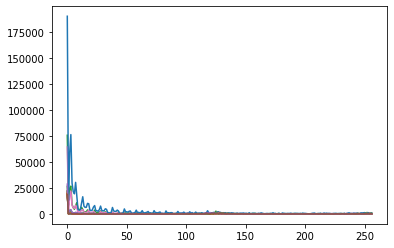

In [1]:
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

SAMPLE_FREQUENCY = 200 * 1000 # 200 kHz
SAMPLE_COUNT = 512

# Set figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16, 9)

# Read file "console.txt"
with open("console.txt", mode="rt") as file:
	k: list[int] = []
	data: list[list[float]] = []

	# Iterate over lines and extract data
	for line in file.readlines():
		k.append(int(line.split(':')[0]))
		dataStr = line[line.index('[') + 1 : line.index(']')].split(',')

		# Initialize data once
		if len(data) < 1:
			data = [[] for i in range(len(dataStr))]

		# Parse floats
		for i, ds in enumerate(dataStr):
			data[i].append( float(dataStr[i]) )

	# Plot the results
	for d in data:
		plt.plot(k, d)

	# Find Peaks
	for i in range(0, len(data)):
		peaks, a = find_peaks(data[i], 10000)
		print(str(i) + str(peaks))

freqs = fftfreq(SAMPLE_COUNT, 1/SAMPLE_FREQUENCY)
print(str(freqs))

In [2]:
from numpy import arange, empty

def fftfreq(n, d=1.0):
	"""The returned float array `f` contains the frequency bin centers in cycles
	per unit of the sample spacing (with zero at the start).
	
	n : int
		Window length.
	d : scalar, optional
		Sample spacing (inverse of the sampling rate). Defaults to 1.
	"""
	val = 1.0 / (n * d)
	results = empty(n, int)
	N = (n-1)//2 + 1
	p1 = arange(0, N, dtype=int)
	results[:N] = p1
	p2 = arange(-(n//2), 0, dtype=int)
	results[N:] = p2
	return results * val

## Experiment with captured data

Text(0.5, 1.0, 'sensorSweepNew3.mat')

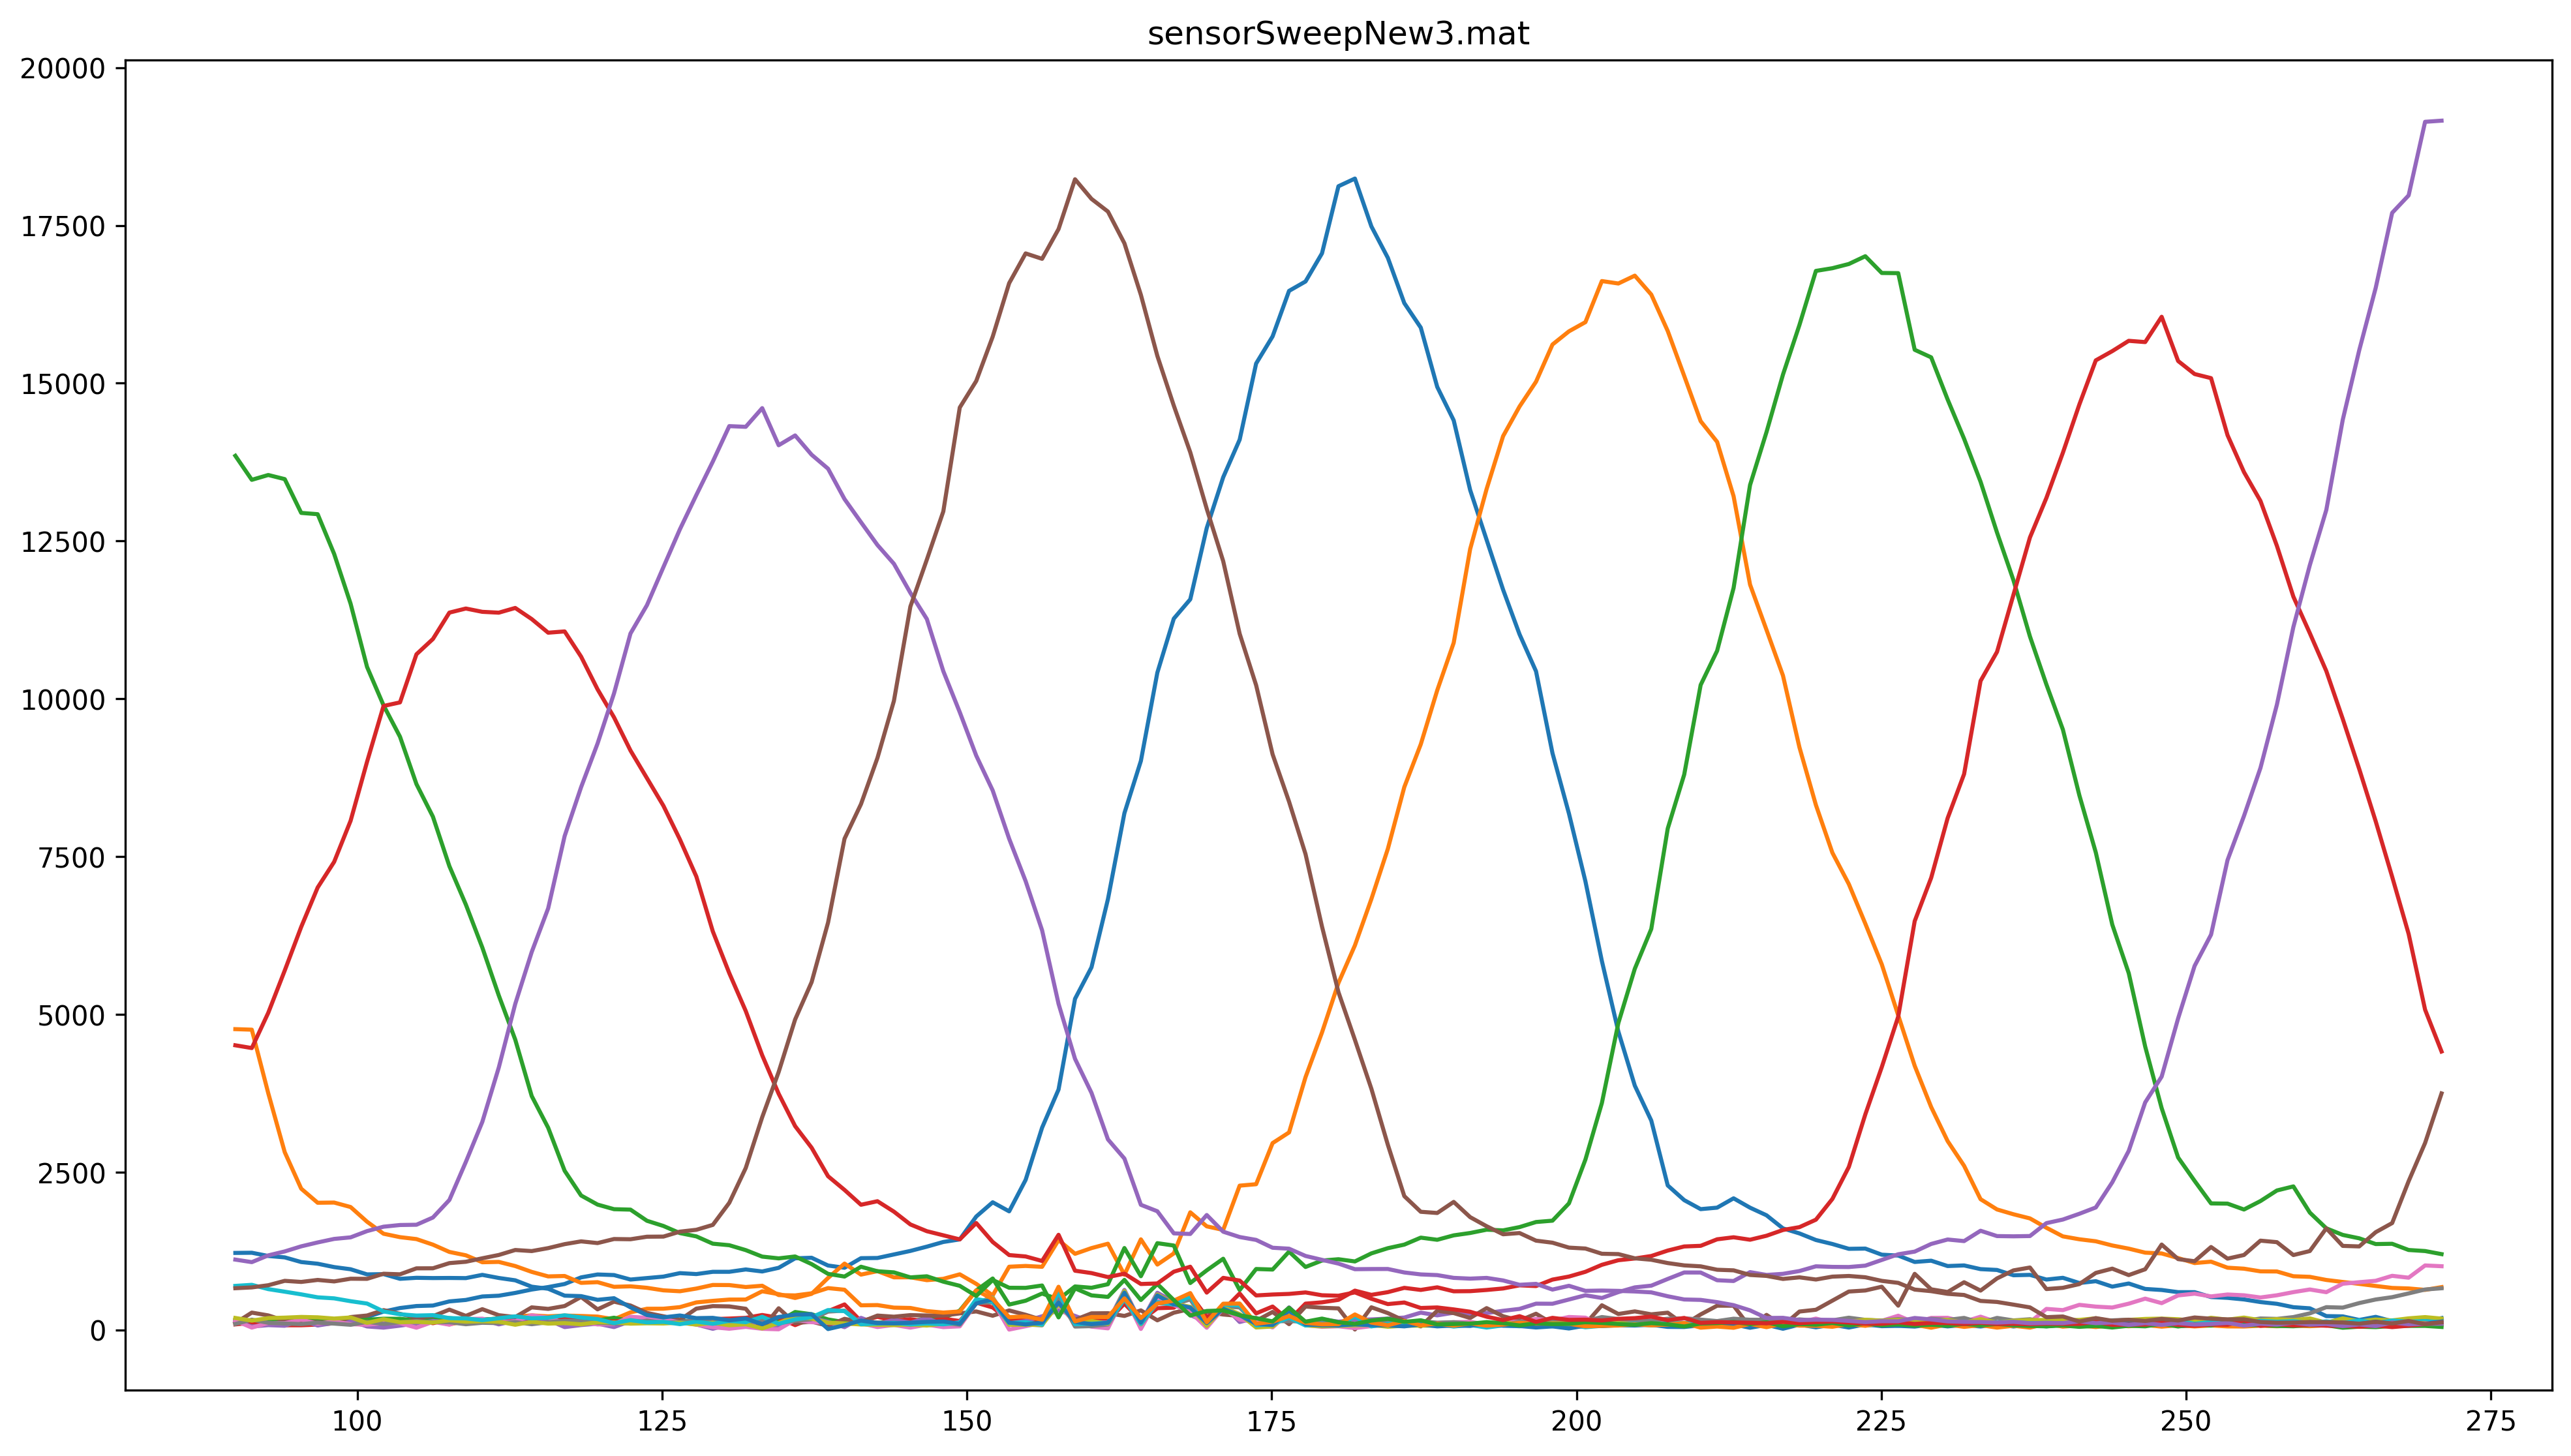

In [3]:
import scipy.io
import matplotlib.pyplot as plt

SERVO_LIMITS = [500, 1833]
SERVO_ANGLES = [90, 270]
STEP_SIZE = 10

#FILENAME = 'sensorSweepBartlettWindow.mat'
#FILENAME = 'sensorSweepNoWindow.mat'
FILENAME = 'sensorSweepNew3.mat' # 'sensorSweepNew3.mat'

# Set figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16, 9)

mat_data = scipy.io.loadmat('mat/' + FILENAME)
channel_magnitudes = mat_data['data']
steps = mat_data['steps']
expectedAngles = mat_data['degrees'].transpose()
#metadata = mat_data['metadata']

plt.plot(expectedAngles, channel_magnitudes)
plt.title(FILENAME)

sensorSweepNew3.mat (newAng)
RMSE: \ang{1,62}, MAE: \ang{1,37}
Average: \ang{0,18}
Median: \ang{0,46}
Variance: \ang{2,6}
Stddev: \ang{1,61}
Min: \ang{-3,41}
Max: \ang{3,04}


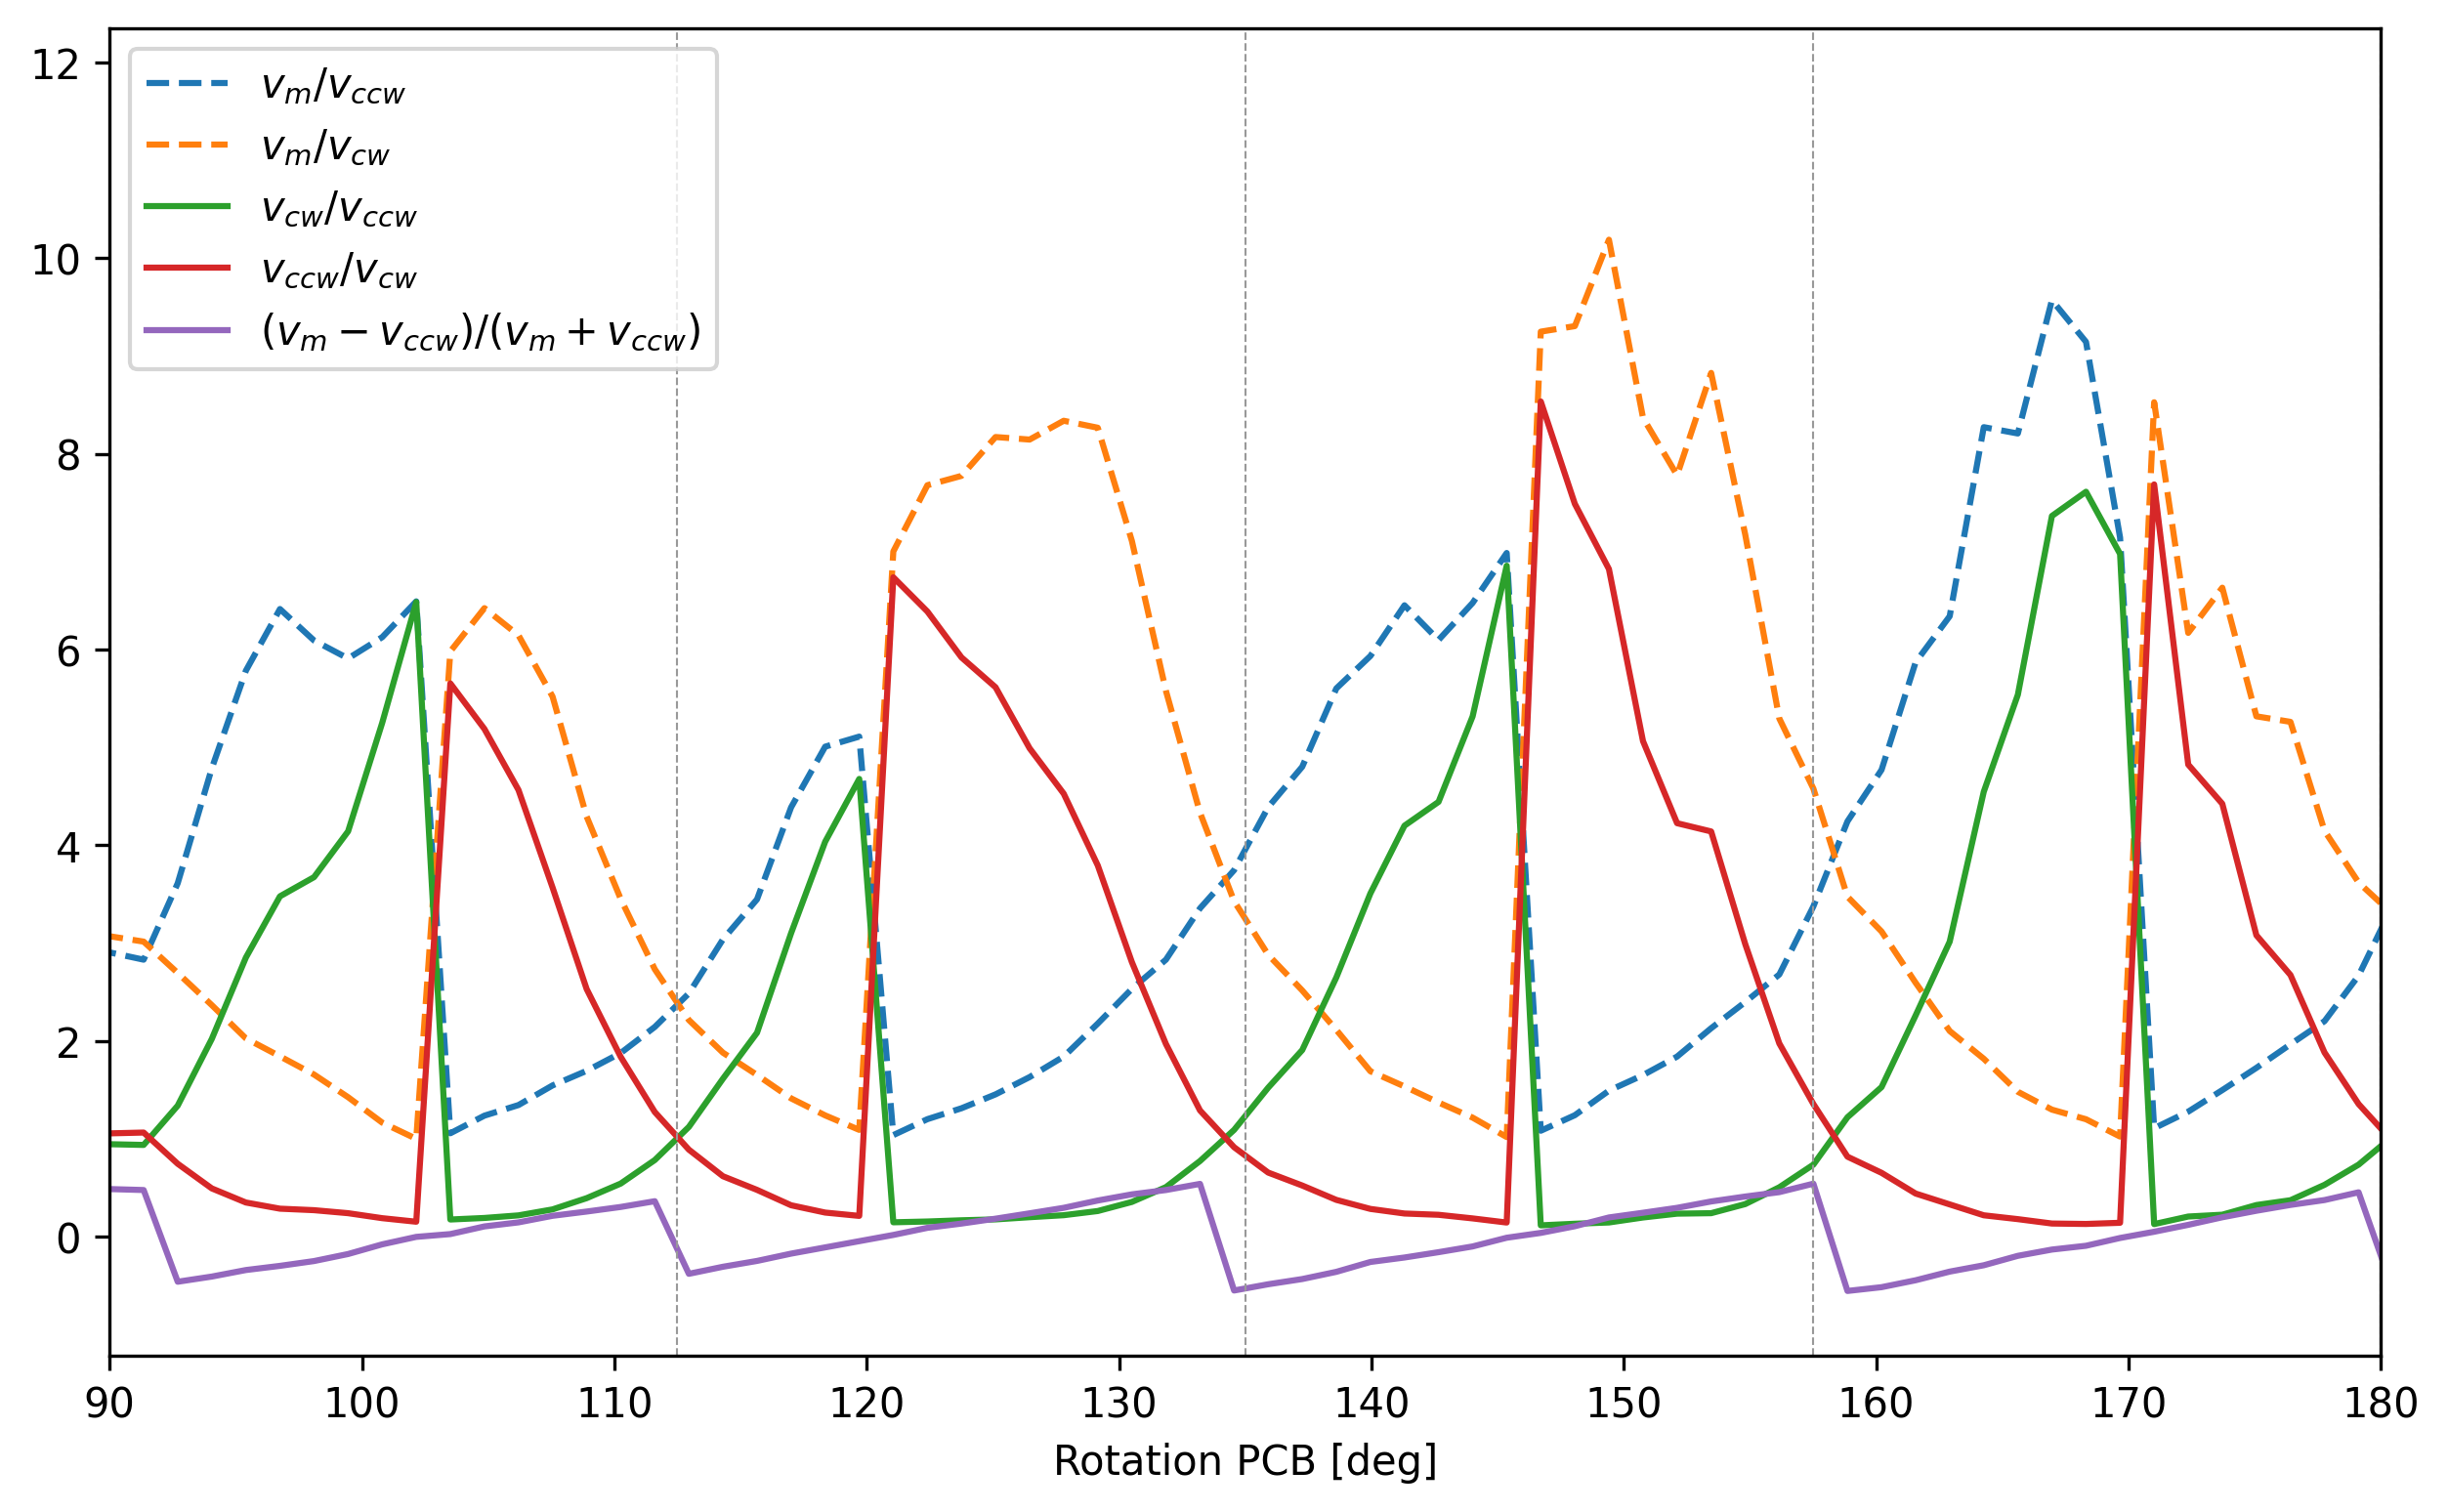

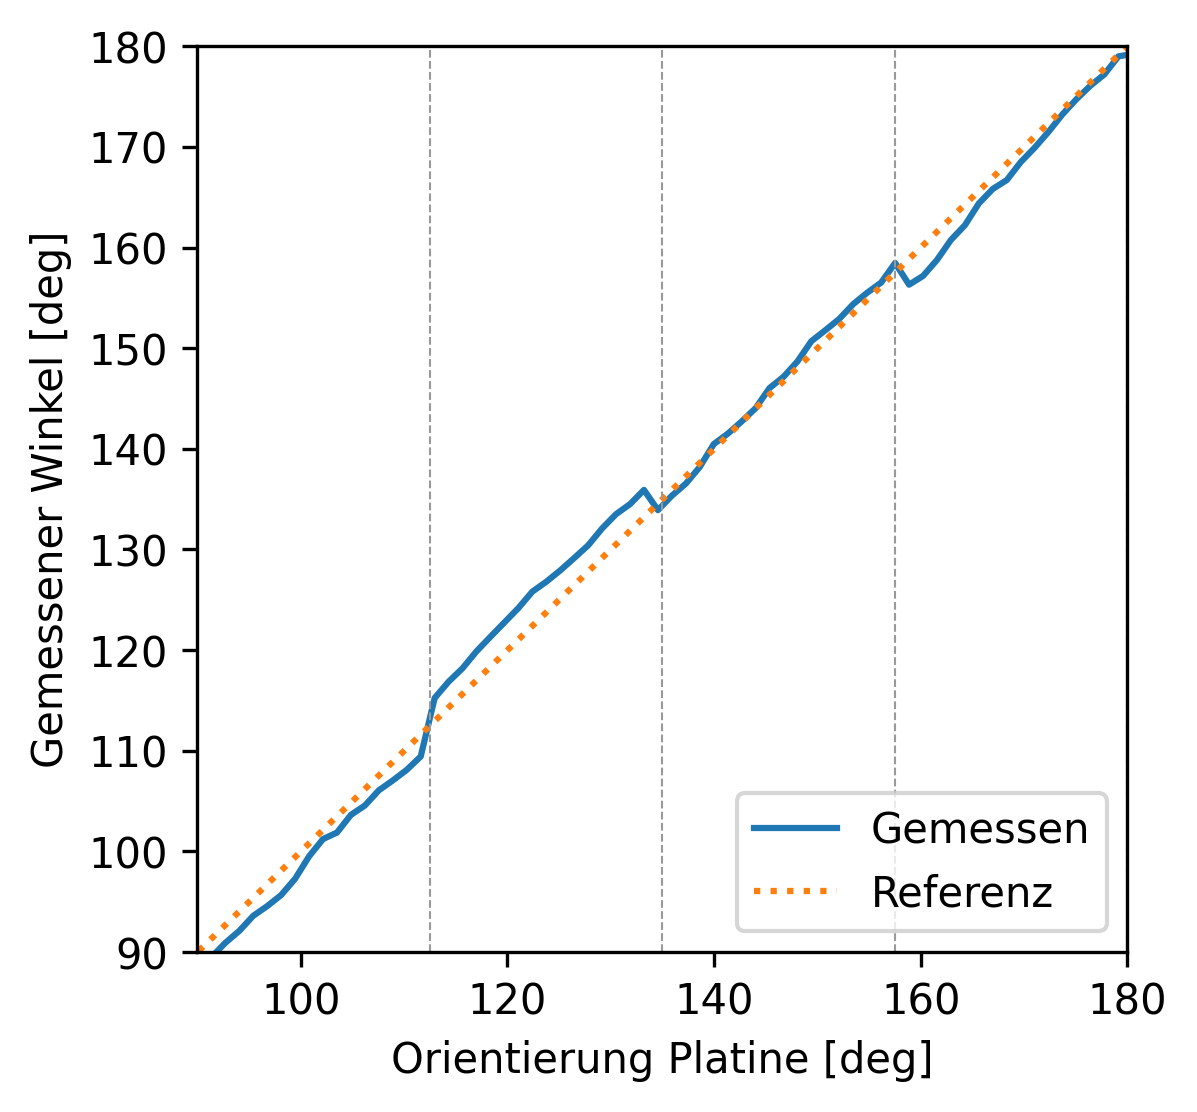

In [4]:
from math import isnan

import numpy

BACHELOR_EXPORT = True
OLD_SUBANGEL = False

# Change figure params
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10, 6)

NUM_CHANNELS = 16

# Calibrate out the slight rotation error
if FILENAME.startswith('sensorSweep_2024_07_22'):
	ROTATION_OFFSET = 178.7
else:
	ROTATION_OFFSET = 180

# Adjust the X Limits
if BACHELOR_EXPORT:
	X_LIM = (90, 180)
else:
	X_LIM = (90, 270)

# Formatter for the numbers
DECIMAL_PLACES = 2
if True:
    myFormat = lambda x: '\\ang{' + str(round(x, DECIMAL_PLACES)).replace('.', ',') + '}'
else:
	myFormat = lambda x: str(round(x, DECIMAL_PLACES)) + '°'

segs_a = []
segs_b = []
segs_c = []
segs_d = []
x=0

segs_sub = [] # The new sub angle calculation method (and the formular that I was trying to think of from the start)

for i in range(0, len(expectedAngles)):
	expectedAngles[i] = (expectedAngles[i] - 0)


def calculateDirection_2(magnitudes):
	"""Third try"""
	NUM_CHANNELS = len(magnitudes)
	PIE_SIZE = 360/NUM_CHANNELS

	max_chan = 0
	for i in range(0, NUM_CHANNELS):
		assert not isnan(magnitudes[i]), "NaN Value in Data"

		if magnitudes[i] > magnitudes[max_chan]:
			max_chan = i
	
	val = magnitudes[max_chan]
	val_cw = magnitudes[(max_chan + 1) % NUM_CHANNELS]
	val_ccw = magnitudes[(max_chan - 1) % NUM_CHANNELS]

	if val_cw > val_ccw:
		max_chan = (max_chan + 1) % NUM_CHANNELS
		val_ccw = val
		val = val_cw

	factor = (val - val_ccw)/(val + val_ccw)
	segs_sub.append(factor)
	return PIE_SIZE*max_chan + PIE_SIZE*(factor - 0.5)


def calculateDirection(magnitudes):
	NUM_CHANNELS = len(magnitudes)
	PIE_SIZE = 360/NUM_CHANNELS/2
	max_chan = 0

	# Loop over all channels to find the peak channel
	for i in range(0, NUM_CHANNELS):
		assert not isnan(magnitudes[i]), "NaN Value in Data"

		if magnitudes[i] > magnitudes[max_chan]:
			max_chan = i

	val = magnitudes[max_chan]
	val_cw = magnitudes[(max_chan + 1) % NUM_CHANNELS]
	val_ccw = magnitudes[(max_chan - 1) % NUM_CHANNELS]
	val_2 = max(val_cw, val_ccw)

	seg_a = val / val_ccw
	seg_b = val_cw / val_ccw
	seg_c = val / val_cw
	seg_d = val_ccw / val_cw

	seg_sub = (val - val_ccw)/(val_cw + val_ccw) # First try of new sub angle calc

	#if val_cw > val_ccw:
	#	factor = (val - val_cw)/(val + val_cw) # Second try of new sub angle calc
	#else:
	#	factor = (val_ccw - val)/(val + val_ccw) # Second try of new sub angle calc

	segs_a.append(seg_a)
	segs_b.append(seg_b)
	segs_c.append(seg_c)
	segs_d.append(seg_d)

	OFFSET = 0.85
	return (360/NUM_CHANNELS)*max_chan - PIE_SIZE/(seg_b+OFFSET) + PIE_SIZE/(seg_d+OFFSET) # Old sub angle calc
	#return (360/NUM_CHANNELS)*max_chan + PIE_SIZE*(factor)


# -----------
calculatedAngles_tmp = []
for d in mat_data['data']:
	if OLD_SUBANGEL:
		angle = calculateDirection(d)
		calculateDirection_2(d)
	else:
		calculateDirection(d)
		angle = calculateDirection_2(d)
	
	calculatedAngles_tmp.append((angle + ROTATION_OFFSET) % 360)
	x = x + 1

measuredAngles = numpy.array(calculatedAngles_tmp)

# Labels 
LABELS = [
	"$v_m / v_{ccw}$",
	"$v_{cw} / v_{ccw}$",
	"$v_m / v_{cw}$",
	"$v_{ccw} / v_{cw}$"
]

# Figure 1: Plot the segments
fig1, ax1 = plt.subplots()

ax1.plot(expectedAngles, numpy.transpose([segs_a, segs_c]), label=[LABELS[0], LABELS[2]], linestyle='dashed')
ax1.plot(expectedAngles, numpy.transpose([segs_b, segs_d]), label=[LABELS[1], LABELS[3]], linestyle='solid')
ax1.plot(expectedAngles, segs_sub, label='$(v_m-v_{ccw})/(v_m+v_{ccw})$')
ax1.legend()
#fig1.suptitle(FILENAME)
#ax1.set_ylim(0, 14)
ax1.set_xlim(X_LIM)
ax1.set_xlabel('Rotation PCB [deg]')

minAngle = min(expectedAngles)
maxAngle = max(expectedAngles)

# Figure 2: 
fig2, ax2 = plt.subplots()
ax2.plot(expectedAngles, measuredAngles, label="Gemessen")
ax2.plot(expectedAngles, expectedAngles, linestyle='dotted', label='Referenz')

ax2.set_xlim(X_LIM)
ax2.set_ylim(X_LIM)
ax2.legend(loc='lower right')
ax2.set_xlabel('Orientierung Platine [deg]')
ax2.set_ylabel('Gemessener Winkel [deg]')
#ax2.set_aspect('equal')

if BACHELOR_EXPORT:
	fig2.set_size_inches(4, 4)
else:
	fig2.set_size_inches(10, 4)

# Generate helper lines at each ir sender location
for i in numpy.linspace(0, 360, num=NUM_CHANNELS + 1): # +1 since there is 0° and 360°
	if i < minAngle or i > maxAngle:
		continue

	ax1.axvline(i, linestyle='--', color='#999999', linewidth=0.5) # vertical lines
	ax2.axvline(i, linestyle='--', color='#999999', linewidth=0.5) # vertical lines

# Calculate RMSE and MAE
angleDiff = expectedAngles.transpose() - measuredAngles
rmse = numpy.sqrt(numpy.mean((angleDiff) ** 2))
mae = numpy.mean(numpy.abs(angleDiff))

stat_median = numpy.median(angleDiff)
stat_average = numpy.mean(angleDiff)
stat_stddev = numpy.std(angleDiff, ddof=1)
stat_variance = numpy.var(angleDiff, ddof=1)
print(f'{FILENAME} ({"oldAng" if OLD_SUBANGEL else "newAng"})')
print(f'RMSE: {myFormat(rmse)}, MAE: {myFormat(mae)}')
print("Average: " + myFormat(stat_average))
print("Median: " + myFormat(stat_median))
print("Variance: " + myFormat(stat_variance))
print("Stddev: " + myFormat(stat_stddev))
print("Min: " + myFormat(numpy.min(angleDiff)))
print("Max: " + myFormat(numpy.max(angleDiff)))

# Save Fig. 1 & 2
fig1.savefig('sweep_relations.pdf', format='pdf', dpi=300, bbox_inches="tight")
fig2.savefig('sweep_angle.pdf', format='pdf', dpi=300, bbox_inches="tight")

In [5]:
from numpy.fft import fftfreq

def fourierBins(n: int, f: float):
	return fftfreq(n, 1/f)


N = 512
SAMPLE_FREQUENCY = 200000
result = fourierBins(N, SAMPLE_FREQUENCY)

i = 128
print(result)
print(result[i:i+1]) 

[      0.        390.625     781.25     1171.875    1562.5      1953.125
    2343.75     2734.375    3125.       3515.625    3906.25     4296.875
    4687.5      5078.125    5468.75     5859.375    6250.       6640.625
    7031.25     7421.875    7812.5      8203.125    8593.75     8984.375
    9375.       9765.625   10156.25    10546.875   10937.5     11328.125
   11718.75    12109.375   12500.      12890.625   13281.25    13671.875
   14062.5     14453.125   14843.75    15234.375   15625.      16015.625
   16406.25    16796.875   17187.5     17578.125   17968.75    18359.375
   18750.      19140.625   19531.25    19921.875   20312.5     20703.125
   21093.75    21484.375   21875.      22265.625   22656.25    23046.875
   23437.5     23828.125   24218.75    24609.375   25000.      25390.625
   25781.25    26171.875   26562.5     26953.125   27343.75    27734.375
   28125.      28515.625   28906.25    29296.875   29687.5     30078.125
   30468.75    30859.375   31250.      31640.625   

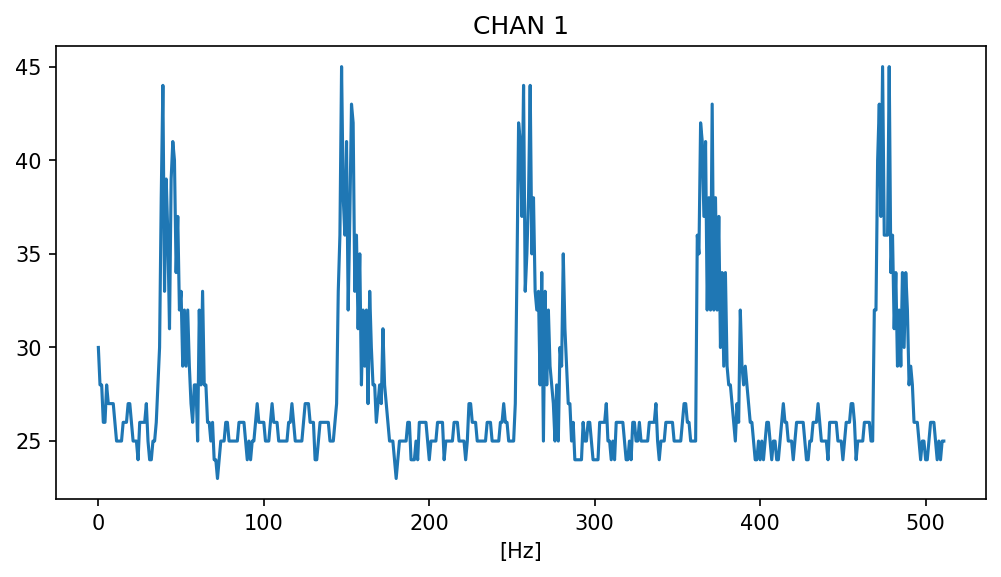

[]


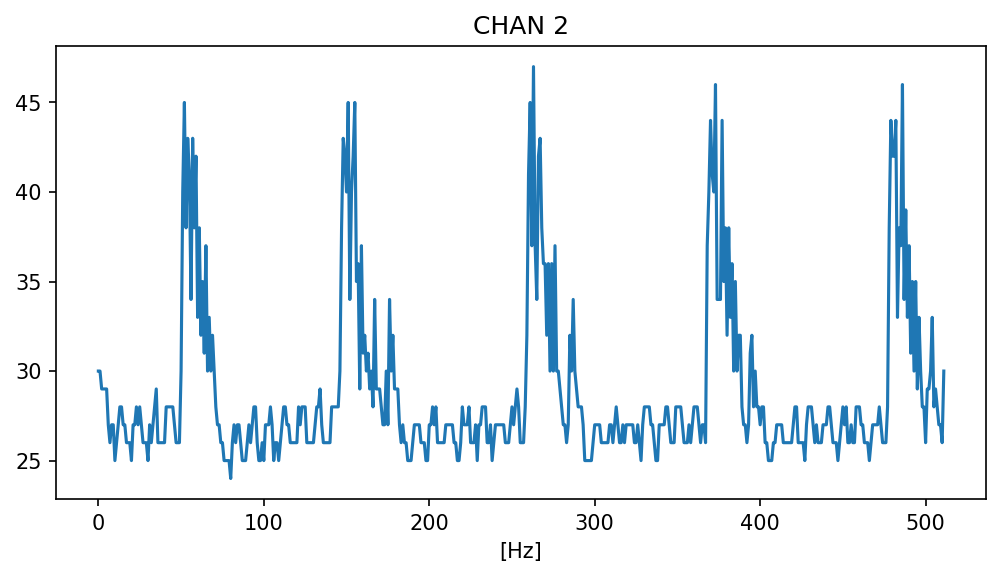

[]


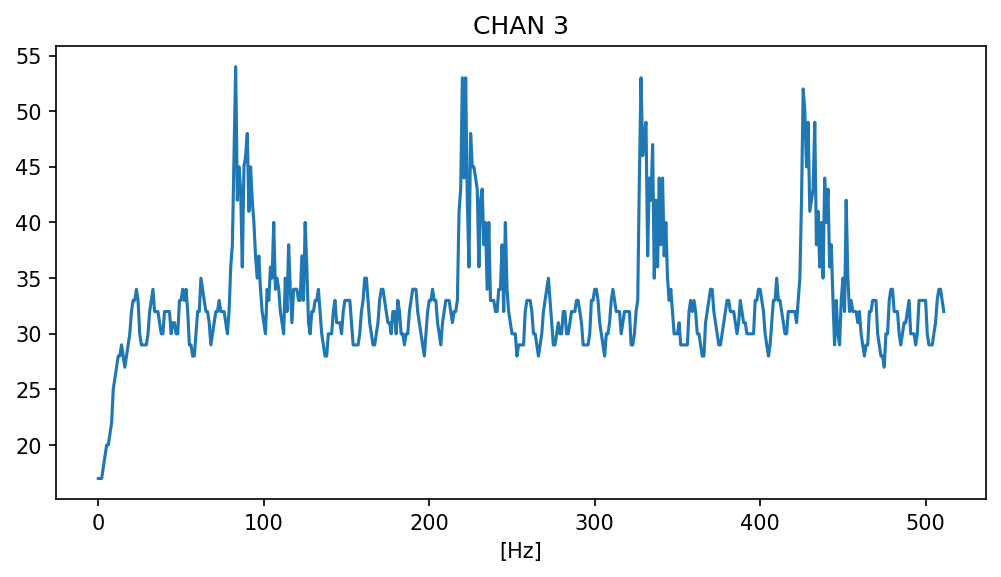

[]


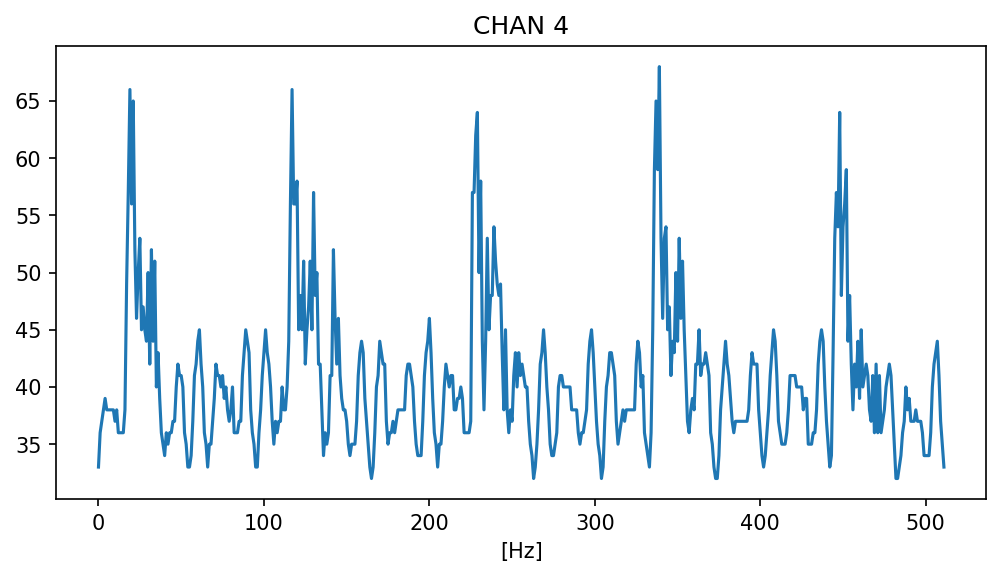

[]


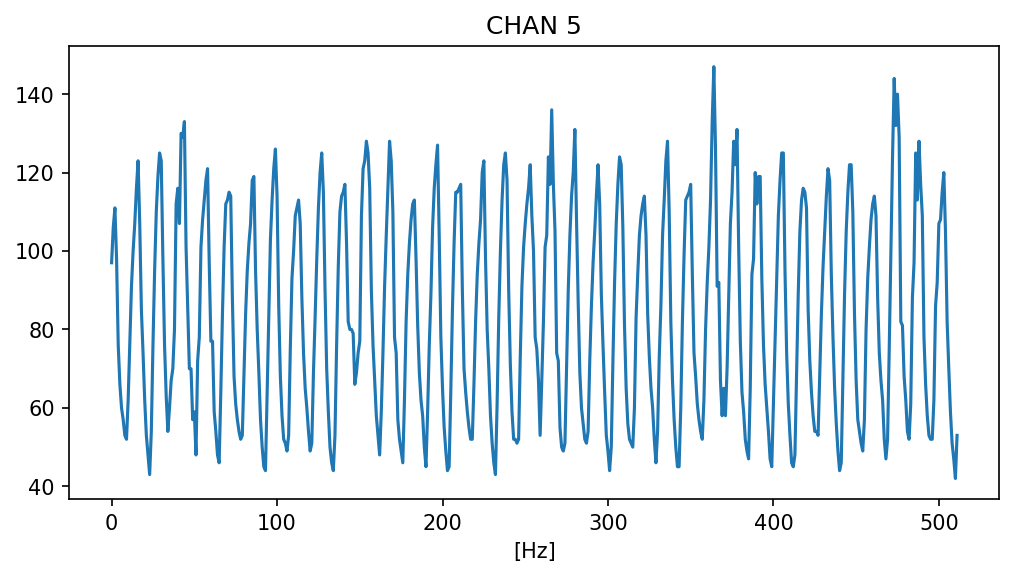

[28906.249999999996]


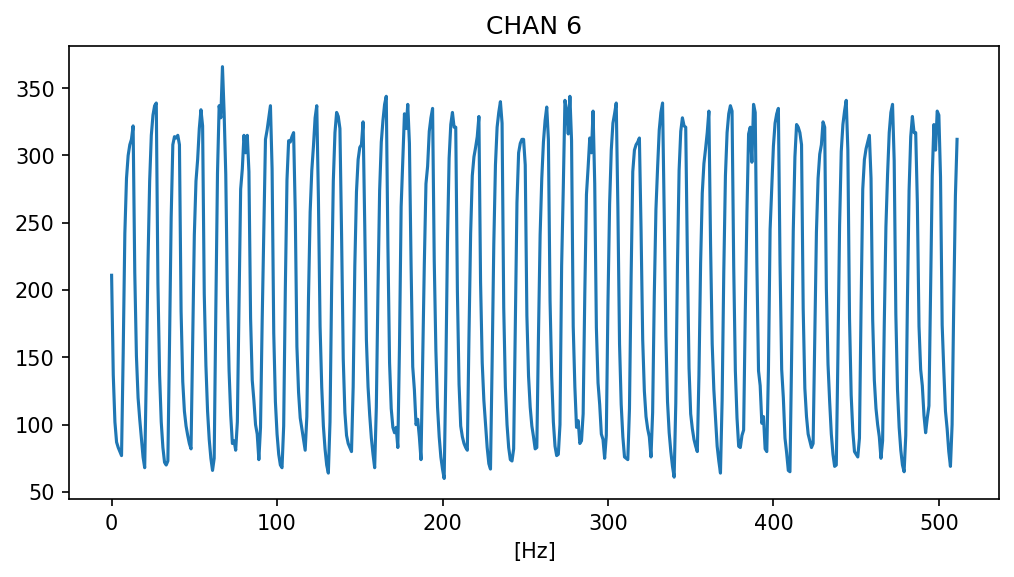

[2343.7499999999995, 3906.2499999999995, 28906.249999999996, 40624.99999999999, 85937.49999999999, 143749.99999999997]


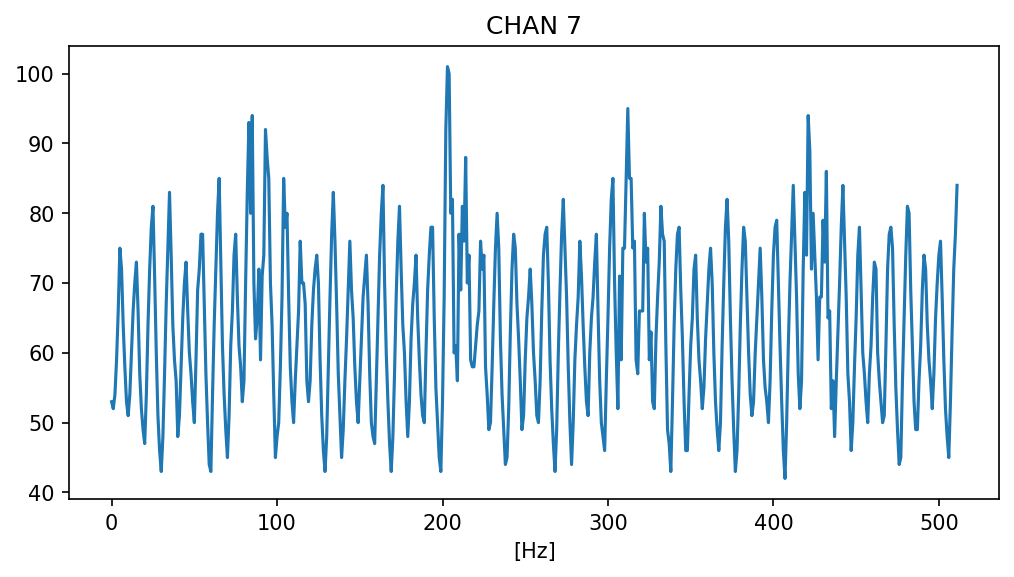

[40624.99999999999]


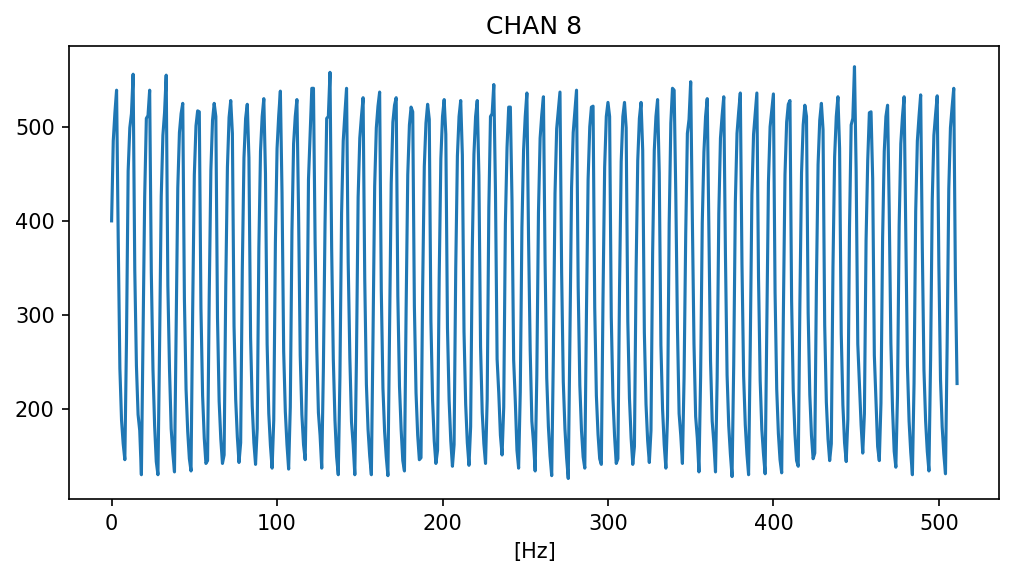

[2343.7499999999995, 3906.2499999999995, 40624.99999999999, 80468.74999999999, 121093.74999999999, 198437.49999999997]


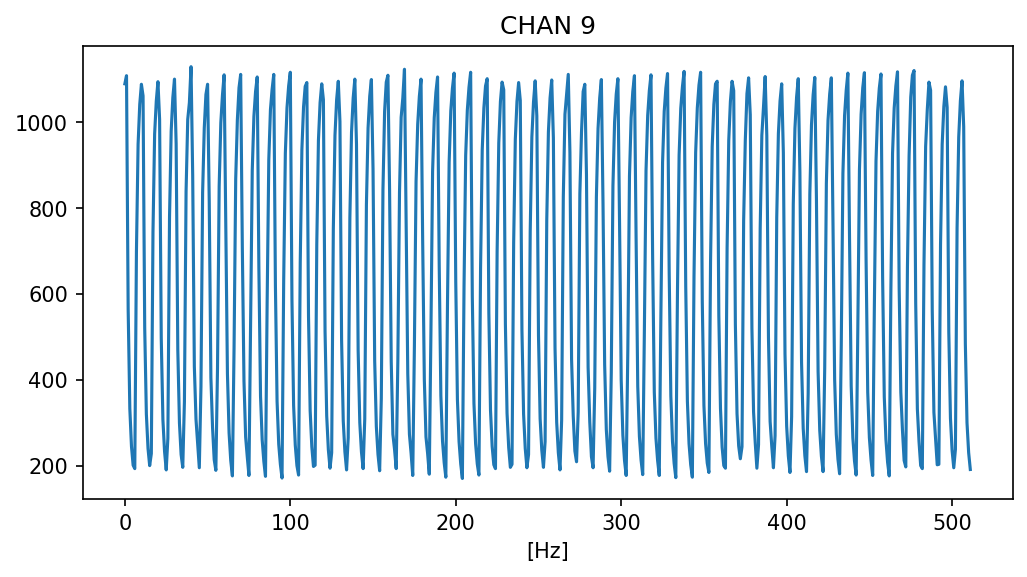

[2343.7499999999995, 3906.2499999999995, 5468.749999999999, 36718.74999999999, 40624.99999999999, 42968.74999999999, 80468.74999999999, 117968.74999999999, 121093.74999999999, 198437.49999999997]


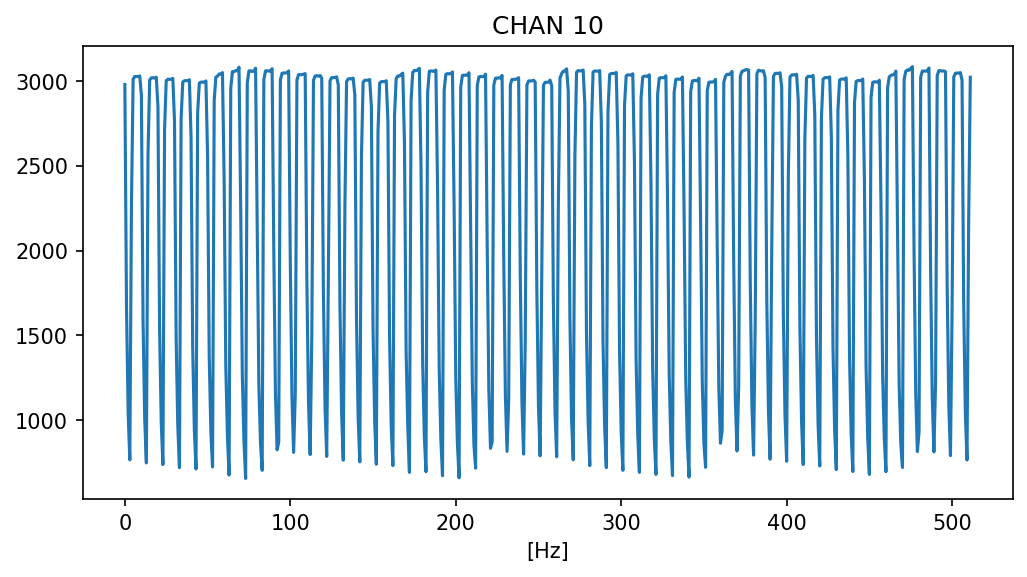

[2343.7499999999995, 3906.2499999999995, 5468.749999999999, 7031.249999999999, 8593.749999999998, 10156.249999999998, 37499.99999999999, 40624.99999999999, 42968.74999999999, 46093.74999999999, 77343.74999999999, 80468.74999999999, 82812.49999999999, 114843.74999999999, 117968.74999999999, 121093.74999999999, 124218.74999999999, 155468.74999999997, 157812.49999999997, 160937.49999999997, 164062.49999999997, 195312.49999999997, 198437.49999999997]


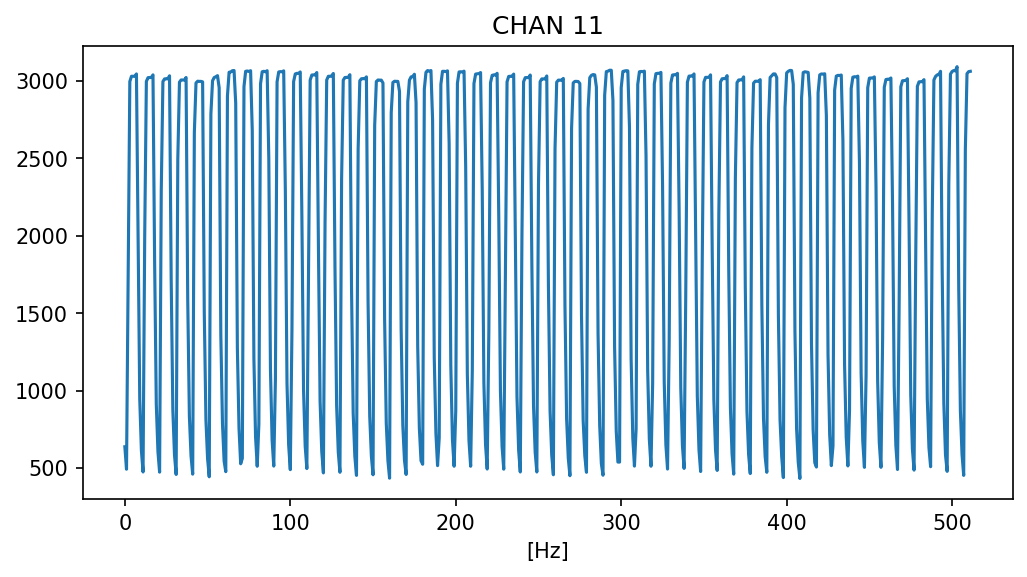

[2343.7499999999995, 3906.2499999999995, 5468.749999999999, 7031.249999999999, 8593.749999999998, 10156.249999999998, 11718.749999999998, 36718.74999999999, 40624.99999999999, 46093.74999999999, 77343.74999999999, 80468.74999999999, 82812.49999999999, 117968.74999999999, 121093.74999999999, 123437.49999999999, 155468.74999999997, 157812.49999999997, 161718.74999999997, 198437.49999999997]


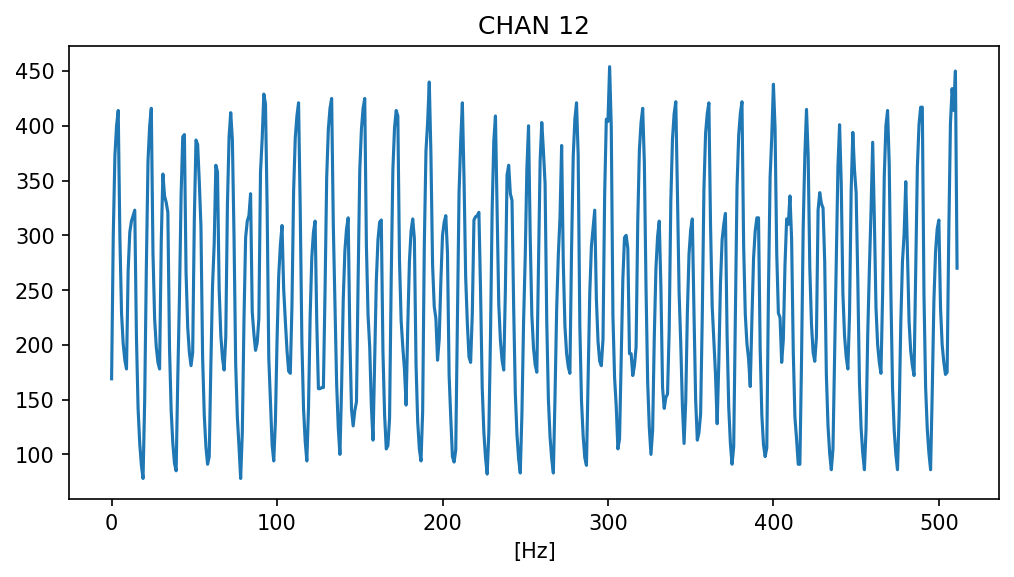

[2343.7499999999995, 19531.249999999996, 40624.99999999999, 57812.49999999999, 121093.74999999999]


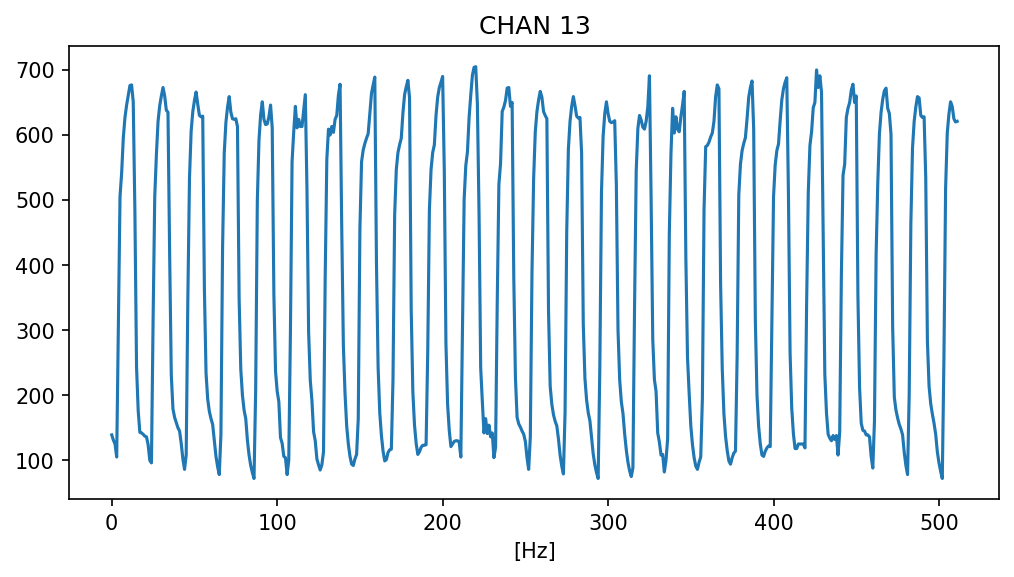

[2343.7499999999995, 3906.2499999999995, 19531.249999999996, 21874.999999999996, 38281.24999999999, 40624.99999999999, 57812.49999999999, 96093.74999999999, 134374.99999999997, 173437.49999999997]


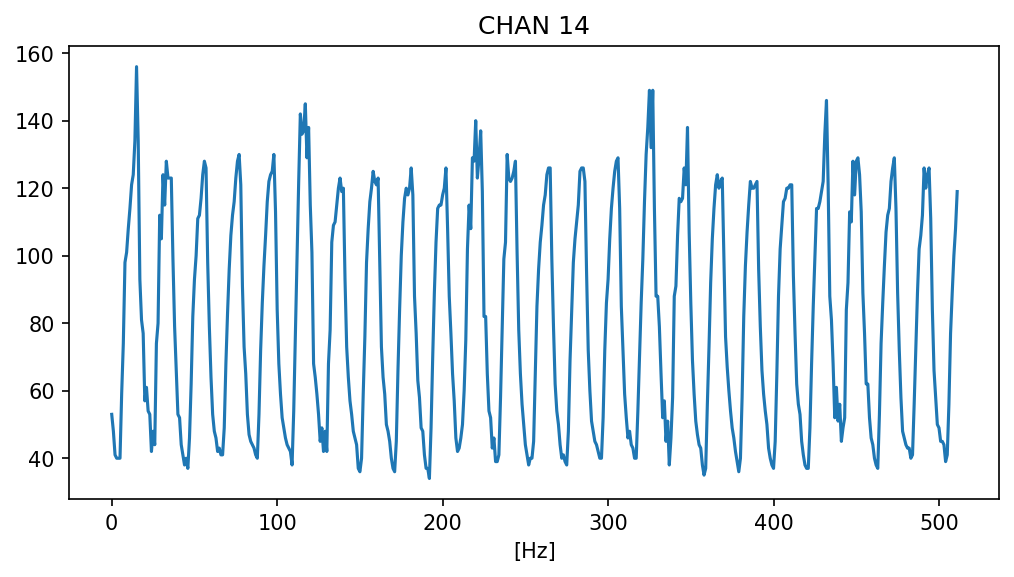

[19531.249999999996]


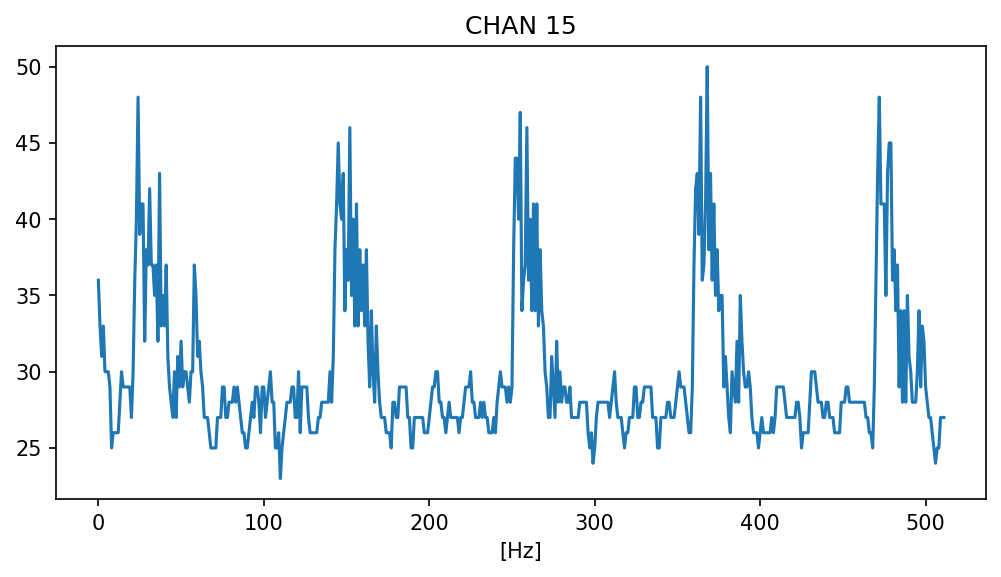

[]


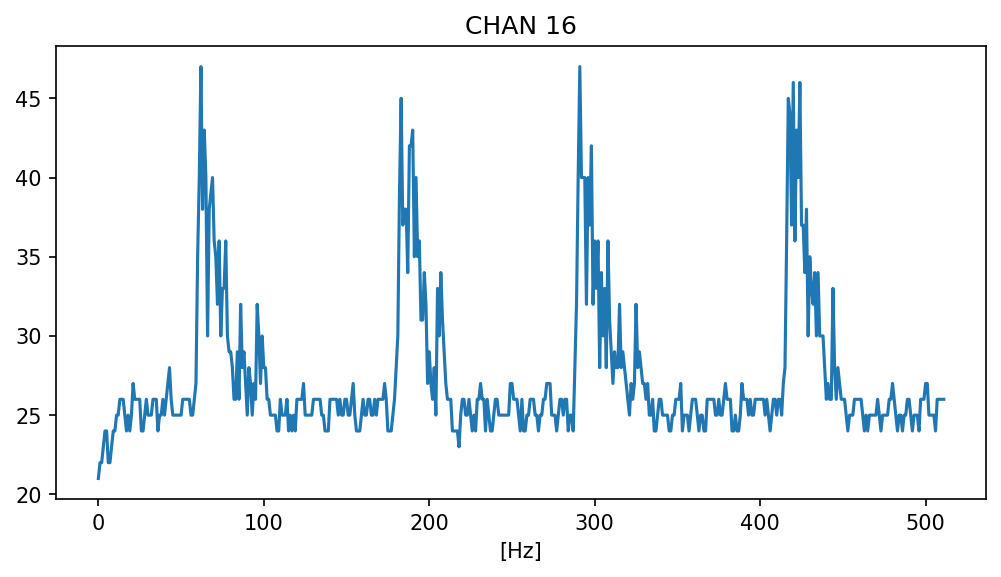

[]


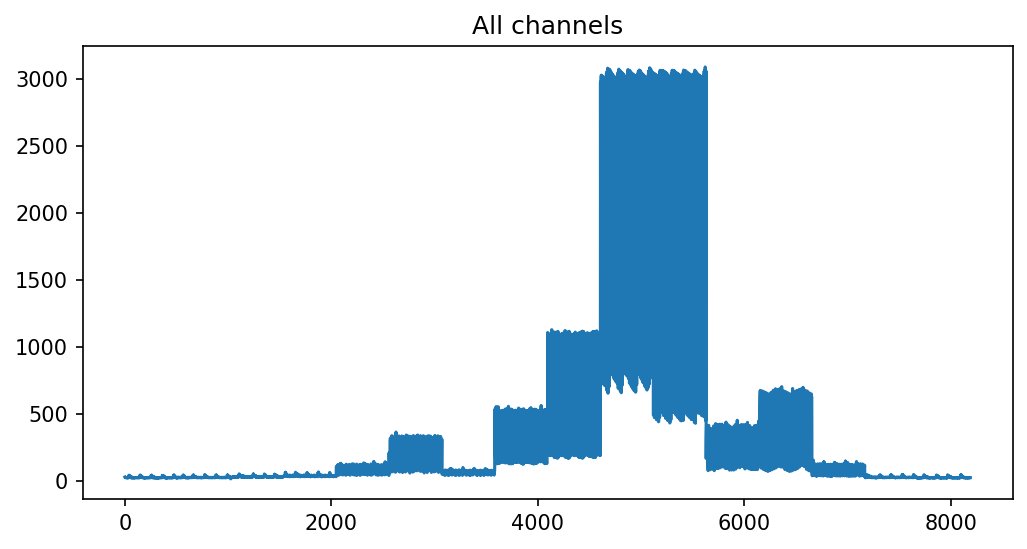

In [6]:
# Display binary dumps
# (gdb) dump binary memory result.bin 0x2001911C 0x2001D11C

import struct
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import rfft, rfftfreq
import numpy as np

plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (8, 4)

NUM_VALUES_CHAN = 512
NUM_CHANNELS = 16
NUM_VALUES = NUM_VALUES_CHAN * NUM_CHANNELS

BEGIN = NUM_VALUES_CHAN * 13

numbers = []

frequencies = rfftfreq(n=512, d=1/400000)

with open('result.bin', mode='rb') as f:
	data = struct.unpack(str(NUM_VALUES) + 'h', f.read())

	for i in range(NUM_CHANNELS):
		cut = np.array(data[NUM_VALUES_CHAN*i : NUM_VALUES_CHAN*(i+1)])
		windowed = cut * signal.windows.bartlett(len(cut))
		transformed = np.absolute(rfft(windowed)) # type: ignore
		plt.plot(cut)
		#plt.plot(frequencies, transformed)
		#plt.xticks(np.arange(0, frequencies.max(), 20000))
		#plt.ticklabel_format(axis='x', style='sci', scilimits=(3, 3), useMathText=True)
		plt.title('CHAN ' + str(i+1))
		plt.xlabel('[Hz]')
		plt.show()

		peaks, _ = signal.find_peaks(transformed, 1000)
		print([frequencies[p] for p in peaks])

plt.plot(data)
plt.title('All channels')
plt.show()

[12500.0, 37500.0, 62500.0, 87500.0, 112500.0]
[15625.0, 46875.0, 78125.0, 109375.0, 140625.0, 171875.0]
[18750.0, 56250.0, 93750.0, 131250.0, 156250.0, 168750.0, 193750.0]


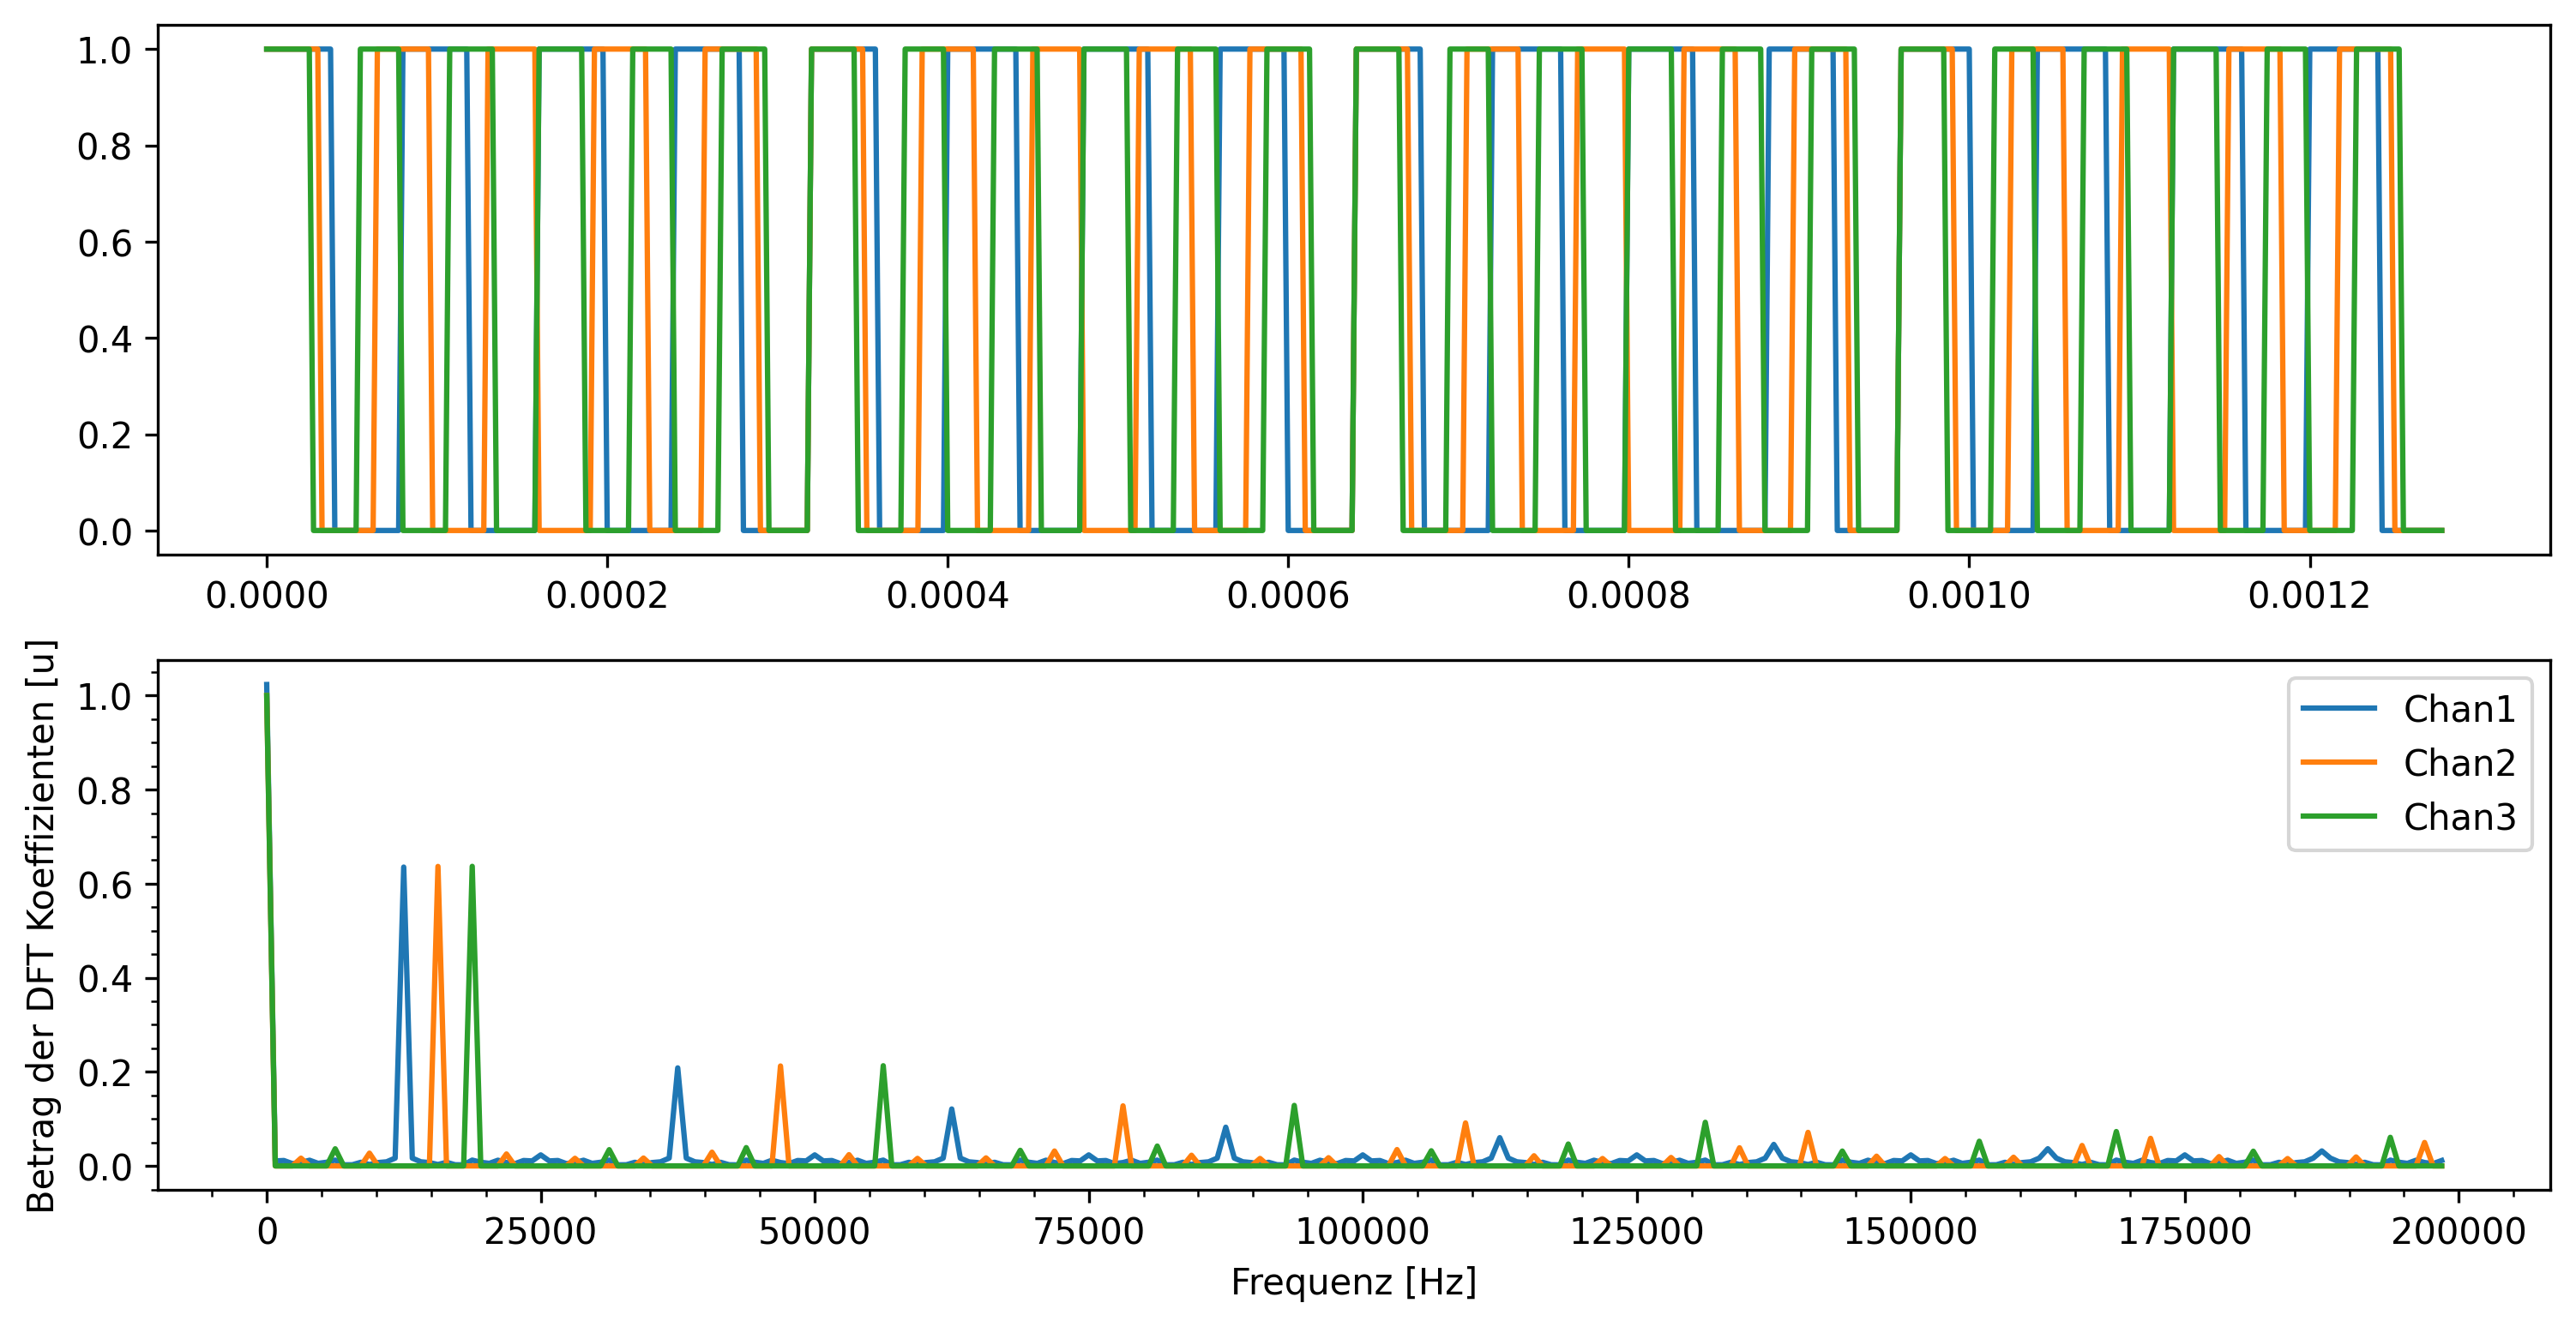

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

FREQ_SAMPLE = 400000 # Hz
NUM_SAMPLES = 512 #

FREQ = [12500, 15625, 18750]#, 21875]

#fig, axs = plt.subplots(1, 1, figsize=(12, 4), dpi=300)
fig, axs = plt.subplots(2, 1, figsize=(16*0.75, 8*0.75), dpi=300)

def simulateFreq(freq_signal, freq_sample, num_samples):
	t = np.linspace(0, (1/freq_sample)*num_samples, num_samples, endpoint=False)
	window_func = np.bartlett(num_samples)

	zeitbereich = signal.square(2 * np.pi * freq_signal * t) + 1
	bildbereich = np.absolute(fft(zeitbereich)) / len(zeitbereich) # type: ignore

	return zeitbereich * 0.5, bildbereich

t = np.linspace(0, (1/FREQ_SAMPLE)*NUM_SAMPLES, NUM_SAMPLES, endpoint=False)
frequencies = fftfreq(NUM_SAMPLES, 1/FREQ_SAMPLE)
frequencies = frequencies[:len(frequencies)//2 - 1]

for i in range(len(FREQ)):
	zeitbereich, bildbereich = simulateFreq(FREQ[i], FREQ_SAMPLE, NUM_SAMPLES)
	
	axs[0].plot(t, zeitbereich)
	axs[1].plot(frequencies, bildbereich[:int(NUM_SAMPLES/2) - 1], label=f"Chan{i+1}")
	#axs.plot(frequencies, bildbereich[:int(NUM_SAMPLES/2) - 1], label=f"Chan{i+1}")
	
	peaks = signal.find_peaks(bildbereich[:int(NUM_SAMPLES/2) - 1], 0.05)
	print([round(frequencies[i], 8) for i in peaks[0]])

plt.minorticks_on()

plt.xlabel('Frequenz [Hz]')
plt.ylabel('Betrag der DFT Koeffizienten [u]')

plt.legend()
plt.savefig("Fig_Harmonics.pdf", dpi=300, bbox_inches='tight')
plt.show()

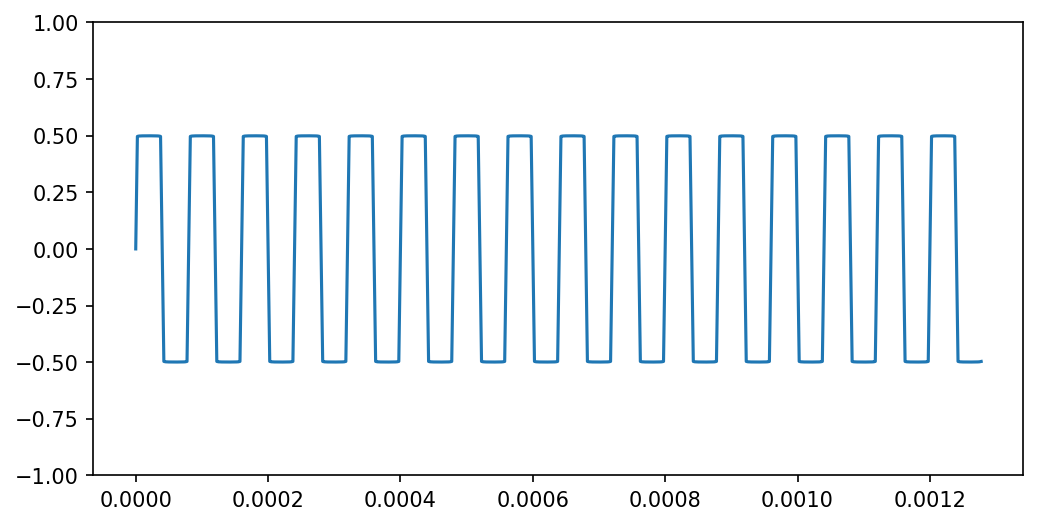

In [8]:
from numpy import cos, pi, sin
import numpy as np
import matplotlib.pyplot as plt


sum_index = np.arange(1, 512, 1)

foo = []

N = 512
F_SAMPLE = 400000

def fourier_reihe_rect(t):
	sum = 0
	alpha = 0.5 # duty cycle
	big_l = (1/12500) # period
	h = 1

	for n in range(1, N):
		bar = (sin(n * pi * alpha) / n) * cos((n * pi * t)/big_l)
		foo.append(round(bar, 8))
		sum += bar
	
	return ((2*h)/pi)*sum

def fourier_reihe_rect_wolfram(x):
	sum = 0
	alpha = 0.5 # duty cycle
	big_l = (1/12500)/2 # period
	h = 1

	for n in range(1, N, 2):
		sum += (1/n) * sin((n*pi*x) / big_l)
	
	return ((2*h)/pi)*sum

x = np.arange(0, (1/F_SAMPLE)*N, (1/F_SAMPLE))
res = np.vectorize(fourier_reihe_rect_wolfram)(x)

plt.plot(x, res)
plt.ylim(-1, 1)
plt.show()